In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score


In [10]:
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)
df=df[['Age','Sex','Fare','Pclass','Survived']].dropna()
df['Sex']=df['Sex'].map({'male':0,'female':1})
df.head()

,Age,Sex,Fare,Pclass,Survived
0,22.0,0,7.2500,3,0
1,38.0,1,71.2833,1,1
2,26.0,1,7.9250,3,1
3,35.0,1,53.1000,1,1
4,35.0,0,8.0500,3,0


In [12]:
x=df[['Age','Sex','Fare','Pclass']]
y=df['Survived']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [13]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

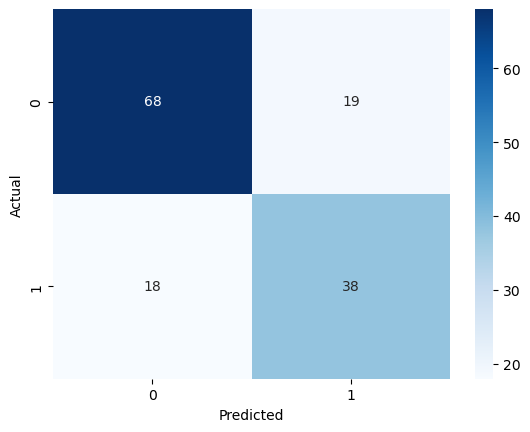

              precision    recall  f1-score   support

           0       0.79      0.78      0.79        87
           1       0.67      0.68      0.67        56

    accuracy                           0.74       143
   macro avg       0.73      0.73      0.73       143
weighted avg       0.74      0.74      0.74       143

ROC_AUC Score: 0.811166


In [16]:
y_pred=model.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True, fmt="d",cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print(classification_report(y_test, y_pred))
y_prob=model.predict_proba(x_test)[:,1]
roc_auc=roc_auc_score(y_test, y_prob)
print(f"ROC_AUC Score:{roc_auc: 3f}")

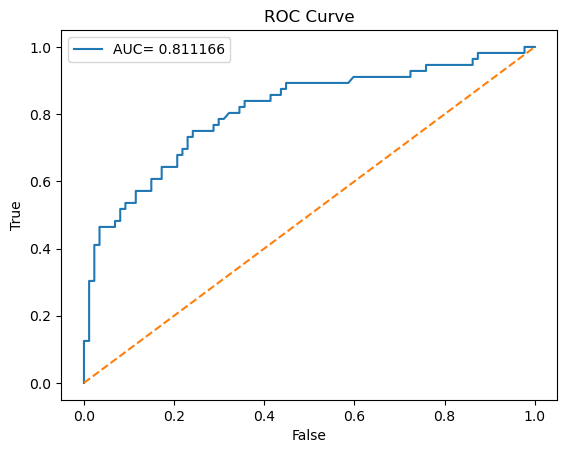

In [18]:
fpr,tpr,thresholds=roc_curve(y_test, y_prob)
plt.plot(fpr,tpr,label=f'AUC= {roc_auc:3f}')
plt.plot([0,1],[0,1],linestyle='--')
plt.xlabel('False')
plt.ylabel('True')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [19]:
threshold =0.3
y_pred_custom=(y_prob>=threshold).astype(int)
print(confusion_matrix(y_test,y_pred_custom))
print(classification_report(y_test,y_pred_custom))

[[57 30]
 [10 46]]
              precision    recall  f1-score   support

           0       0.85      0.66      0.74        87
           1       0.61      0.82      0.70        56

    accuracy                           0.72       143
   macro avg       0.73      0.74      0.72       143
weighted avg       0.75      0.72      0.72       143

